[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaxMitre/Mate_MercadosFinancieros/blob/main/Semana1_Bonos.ipynb)

# Bonos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Bono cupón cero

$$VP = \frac{VF}{(1+r)^{T}}$$

Valuación mas sencilla de un Bono cupón cero:

In [ ]:
def zero_coupon_bond_price(face_value, risk_free_rate, time_to_maturity):
    """
    Calcula el precio de un bono cupon cero con tasa libre de riesgo constante

    Parameters:
    face_value (float): Valor nominal del bono.
    risk_free_rate (float): Tasa libre de riesgo constante.
    time_to_maturity (float): Tiempo hasta la vencimiento en años.

    Returns:
    float: Precio del bono cupon cero.
    """
    P = face_value / (1 + risk_free_rate) ** time_to_maturity
    return P

In [ ]:
# Ejemplo
face_value = 1000
risk_free_rate = 0.03
time_to_maturity = 5

bond_price = zero_coupon_bond_price(face_value, risk_free_rate, time_to_maturity)
print(f"El precio del bono cupón cero es: {bond_price:.2f}")

El precio del bono cupón cero es: 862.61


In [ ]:
class ZeroCouponBond:
    def __init__(self, face_value, risk_free_rate, time_to_maturity):
        """
        Método inicializador o constructor.
        """
        self.face_value = face_value
        self.risk_free_rate = risk_free_rate
        self.time_to_maturity = time_to_maturity

    def price(self):
        """
        Calcula el precio del bono cupón cero.

        Returns:
        float: Precio.
        """
        return self.face_value / (1 + self.risk_free_rate) ** self.time_to_maturity



In [ ]:
bono = ZeroCouponBond(100, 0.11, 2)

In [ ]:
bono

In [ ]:
bono.face_value

100

In [ ]:
bono.risk_free_rate

0.11

In [ ]:
bono.time_to_maturity

2

In [ ]:
bono.price()

81.16224332440548

In [ ]:
# Example usage
face_value = 1000
risk_free_rate = 0.03
time_to_maturity = 5

bond = ZeroCouponBond(face_value, risk_free_rate, time_to_maturity)
bond_price = bond.price()
print(f"El precio del bono cupón cero es: {bond_price:.2f}")

El precio del bono cupón cero es: 862.61


# Ejercicio 1:
Una empresa desea calcular el valor presente de un bono cero cupón con un valor nominal de $1,000 y un vencimiento a 5 años. La tasa de interés constante que se utiliza para descontar el bono es del 4% anual.

Tareas
Calcular el valor presente del bono cero cupón utilizando la fórmula del valor presente con una tasa de interés constante.
Imprimir el valor presente del bono. [utilizando la función y también el objeto 2 casos]

In [ ]:
# Espacio para le Ejercicio 1

# Bono con cupones

$$ P = \sum_{t=1}^{N} \frac{C}{(1+r)^{t}} + \frac{F}{(1+r)^{N}}  $$

In [ ]:
def bond_price(face_value, coupon_rate, years_to_maturity, ytm):
    annual_coupon_payment = face_value * (coupon_rate / 100)
    bond_price = 0

    # Valor presente de los cupones
    for t in range(1, years_to_maturity + 1):
        bond_price += annual_coupon_payment / ((1 + ytm / 100) ** t)

    # Calcula el valor presente del valor nominal
    bond_price += face_value / ((1 + ytm / 100) ** years_to_maturity)

    return bond_price

# Parámetros
face_value = float(input("Ingrese el valor nominal del bono: "))
coupon_rate = float(input("Ingrese el porcentaje que paga el cupón: "))
years_to_maturity = int(input("Ingrese el tiempo de madurez en años: "))
ytm = float(input("Ingrese la tasa interna de retorno: "))

# Cálculo del precio del bono
price = bond_price(face_value, coupon_rate, years_to_maturity, ytm)

print(f"El precio del bono es: ${price:.2f}")

Ingrese el valor nominal del bono: 100
Ingrese el porcentaje que paga el cupón: 5
Ingrese el tiempo de madurez en años: 4
Ingrese la tasa interna de retorno: 11
El precio del bono es: $81.39


# Ejercicio 2:
Programe la valuación del bono con cupones, pero como un objeto de Python

In [ ]:
# Espacio para ejercicio 2
class BonoCupon:
    def __init__(self, f_v, c_r, y_to_mat, ytm):
        """
        Método inicializador o constructor.
        """
        self.face_value = f_v
        self.coupon_rate = c_r
        self.years_to_maturity = y_to_mat
        self.ytm = ytm
        self.precio = self.price()

    def price(self):
        """
        Calcula el precio del bono cupón
        Returns:
        float: Precio.
        """

        annual_coupon_payment = self.face_value * (self.coupon_rate / 100)
        bond_price = 0
        # Valor presente de los cupones
        for t in range(1, self.years_to_maturity + 1):
            bond_price += annual_coupon_payment / ((1 + self.ytm / 100) ** t)
        bond_price += self.face_value / ((1 + self.ytm / 100) ** self.years_to_maturity)
        return bond_price

In [ ]:
bono_cupon = BonoCupon(100, 5, 4, 11)

In [ ]:
bono_cupon.ytm

11

# Ejercicio 3:

Si en el caso anterior no se tiene el precio del bono como un atributo del objeto, agreguelo

In [ ]:
# Espacio para ejercicio 3

# Modelo de Vasicek

Se toma como supuesto que la tasa libre de riesgo es un proceso estocástico que cumple con la siguiente SDE (Ecuación Diferencial Estocástica, siglas en inglés)

$$dr_t= a(b-r_t)\, dt + \sigma \, dW_t$$



La solución es:

$$ r_t = r_0 e^{-a t} +  b\left(1- e^{-a t}\right) + \sigma e^{-a t}\int_0^t e^{a s}\,dW_s$$



# Pregunta
¿Puede la "tasa libre de riesgo" ser constante? ¿Que caso sería este en la ecuación de arriba?

In [ ]:
# Bono cupon zero
def vasicek_bond_price(r, a, b, sigma, t, T):
    def B(t, T, a):
        return (1 - np.exp(-a * (T - t))) / a

    def A(t, T, a, b, sigma):
        B_t_T = B(t, T, a)
        return np.exp((b - (sigma**2 / (2 * a**2))) * (B_t_T - (T - t)) - (sigma**2 / (4 * a)) * B_t_T**2)

    B_t_T = B(t, T, a)
    A_t_T = A(t, T, a, b, sigma)

    return A_t_T * np.exp(-B_t_T * r)

# Input parameters
r = float(input("Ingrese la tasa de interés a corto plazo (r): "))
a = float(input("Ingrese la velocidad de retorno a la media (a): "))
b = float(input("Ingrese la taza de interés a largo plazo (b): "))
sigma = float(input("Ingrese la volatilidad de la tasa de interés (sigma): "))
t = float(input("Ingrese el tiempo actual (t): "))
T = float(input("Ingrese el tiempo de madurez (T): "))

# Calculate bond price
price = vasicek_bond_price(r, a, b, sigma, t, T)

print(f"El precio del bono cupón cero es: ${price:.2f}")



¿Qué podemos hacer con "r" para que sea mas realista?

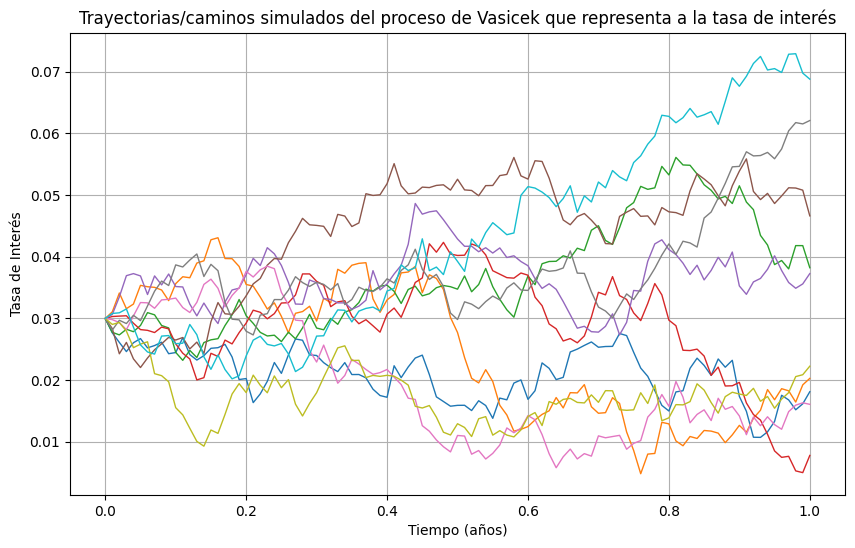

In [ ]:
def vasicek_paths(r0, a, b, sigma, T, dt, n_paths):
    """
    Simula trayectorias del proceso de Vasicek que simula la tasa de interés

    Parametros:
    r0 (float): Tasa de interes inicial.
    a (float): Speed of reversion.
    b (float): Tasa promedio a largo plazo.
    sigma (float): Volatidlidad de tasa de interes.
    T (float): Tiempo total para simulaciones.
    dt (float): Tamaño de cada paso temporal.
    n_paths (int): Número de caminos simulados.

    Returns:
    np.ndarray: Caminos que simulan la tasa de interés.
    """
    n_steps = int(T / dt)
    paths = np.zeros((n_steps + 1, n_paths))
    paths[0] = r0

    for t in range(1, n_steps + 1):
        dt_sqrt = np.sqrt(dt)
        dW = np.random.normal(0, dt_sqrt, n_paths)
        r_t = paths[t - 1]
        dr = a * (b - r_t) * dt + sigma * dW
        paths[t] = r_t + dr

    return paths

# Ejemplo
r0 = 0.03
a = 0.1
b = 0.05
sigma = 0.02
T = 1.0
dt = 0.01
n_paths = 10

paths = vasicek_paths(r0, a, b, sigma, T, dt, n_paths)

# Visualización de trayectorias
time_grid = np.linspace(0, T, int(T / dt) + 1)
plt.figure(figsize=(10, 6))
for i in range(n_paths):
    plt.plot(time_grid, paths[:, i], lw=1)
plt.title('Trayectorias/caminos simulados del proceso de Vasicek que representa a la tasa de interés')
plt.xlabel('Tiempo (años)')
plt.ylabel('Tasa de Interés')
plt.grid(True)
plt.show()
